# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay, brier_score_loss
)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Extração dos dados

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/xG/"

X_train = pd.read_csv(path + "X_train_.csv")
X_test  = pd.read_csv(path + "X_test_.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test  = pd.read_csv(path + "y_test.csv")
xg = pd.read_csv(path + 'X_baseline.csv')
xg_baseline = xg.loc[X_test.index]
xg_baseline = xg_baseline['shot_statsbomb_xg'].values

# Funções Auxiliares

In [ ]:
def result(X_test, model):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    brier = brier_score_loss(y_test, y_prob)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nBrier Score: ", round(brier, 4))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title("Curva ROC")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(y_prob, color='blue', label='SVM (xG)', kde=True, stat='density', linewidth=0)
    sns.histplot(xg_baseline, color='red', label='StatsBomb (xG)', kde=True, stat='density', linewidth=0)
    plt.title('Distribuição de Probabilidades Previstas (Teste)')
    plt.xlabel('Probabilidade Prevista (xG)')
    plt.legend()
    plt.show()

    plt.hist(y_prob, bins=100)
    plt.show()

    print("Min", np.min(y_prob))
    print("Max", np.max(y_prob))
    print("Mean", np.mean(y_prob))

# Treinamento 1 - Modelo Base

In [ ]:
svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1400
           1       0.76      0.08      0.14       167

    accuracy                           0.90      1567
   macro avg       0.83      0.54      0.54      1567
weighted avg       0.89      0.90      0.86      1567


Brier Score:  0.0891


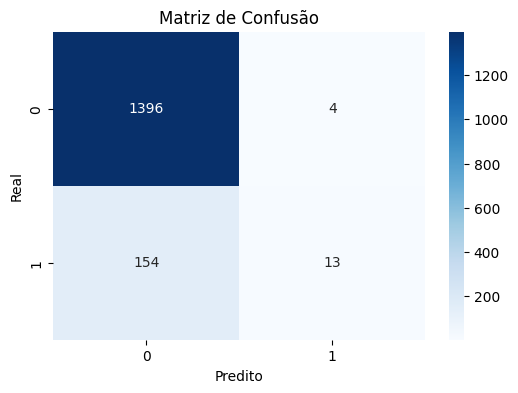

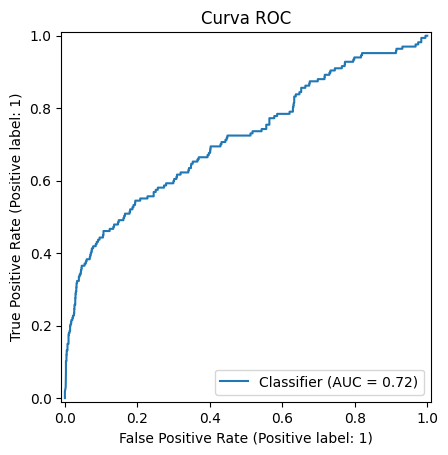

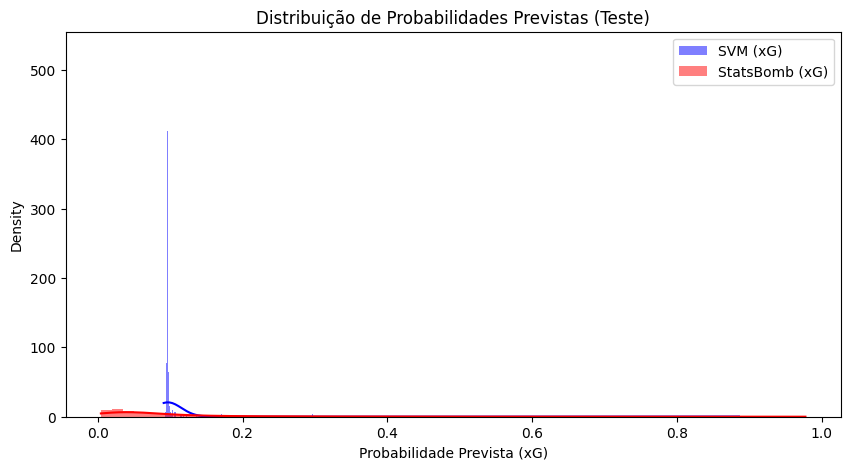

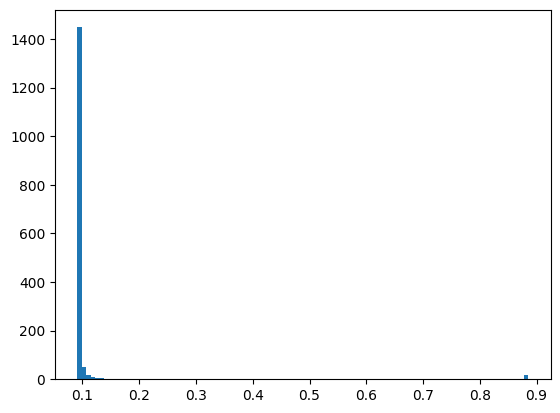

Min 0.0911065166860701
Max 0.8854422431402779
Mean 0.10648846389110832


In [ ]:
result(X_test, svm)

# Treinamento 2 - Modelo Base + PCA

## PCA

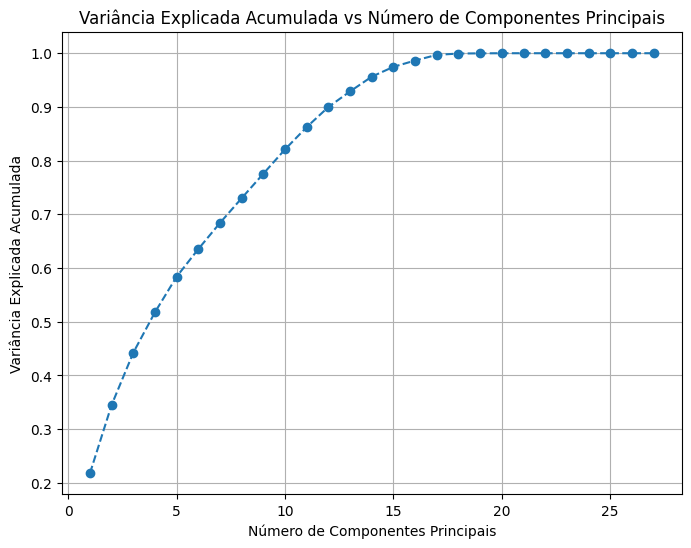

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar o PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plotar a variância explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, X_train_scaled.shape[1] + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada vs Número de Componentes Principais')
plt.grid(True)
plt.show()

## 2 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.62      0.20      0.31       167

    accuracy                           0.90      1567
   macro avg       0.77      0.59      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0848


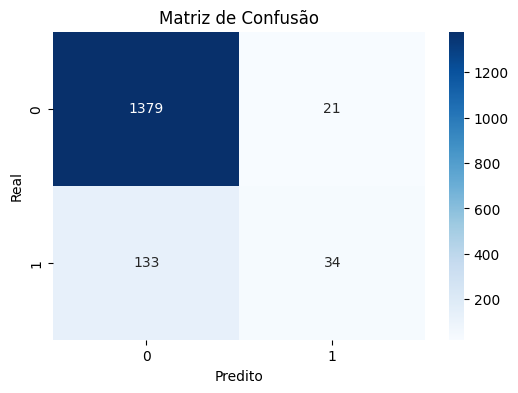

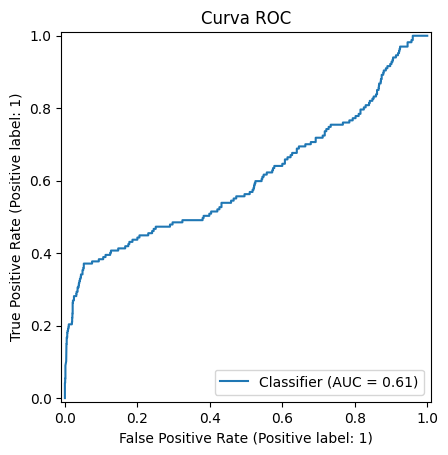

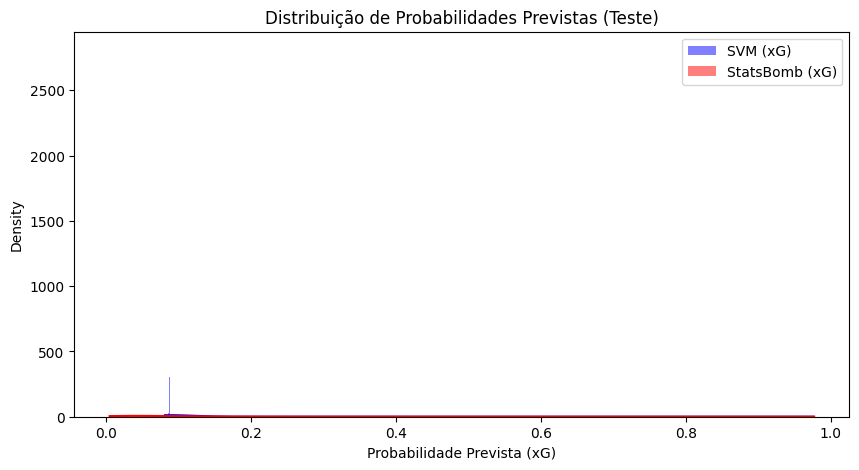

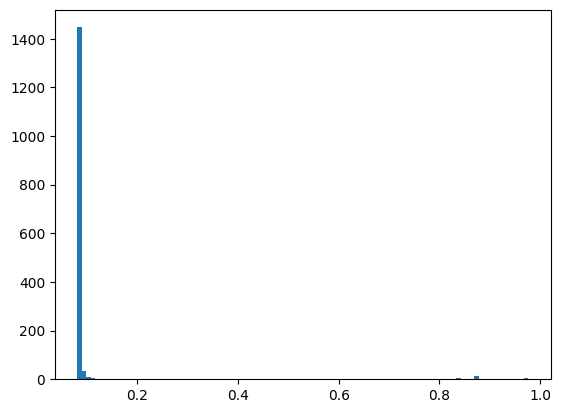

Min 0.08069015451800332
Max 0.9764030309892499
Mean 0.11470330203538949


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 5 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.62      0.20      0.30       167

    accuracy                           0.90      1567
   macro avg       0.77      0.59      0.62      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0842


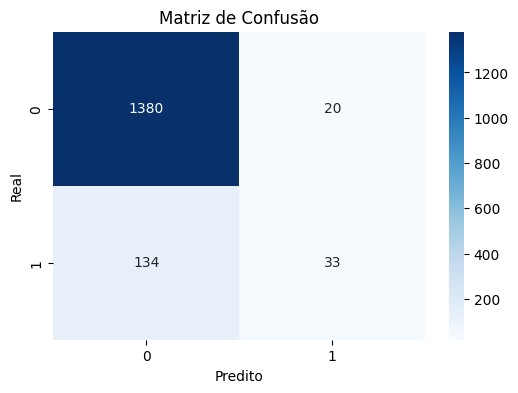

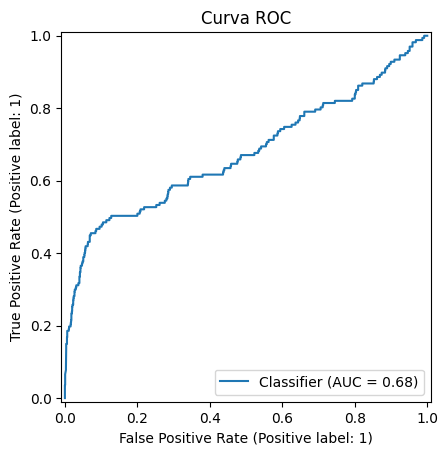

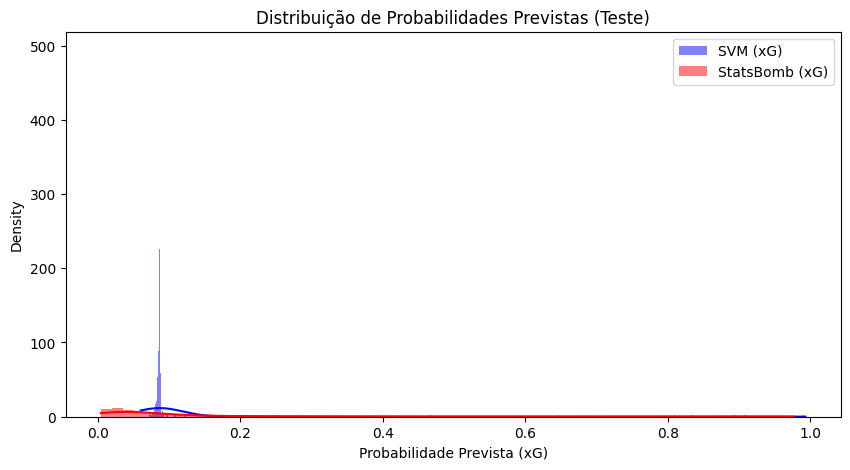

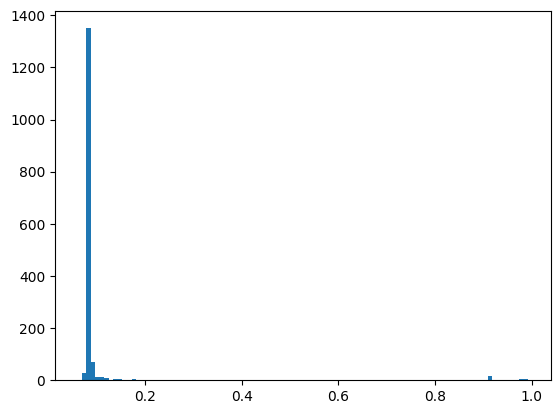

Min 0.06028352728491694
Max 0.9931920185350025
Mean 0.11518548596535716


In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 7 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.63      0.20      0.30       167

    accuracy                           0.90      1567
   macro avg       0.77      0.59      0.62      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0837


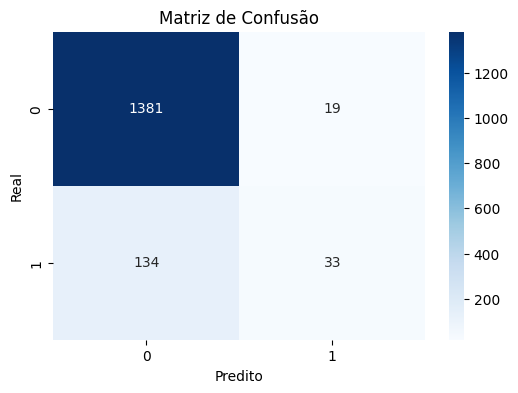

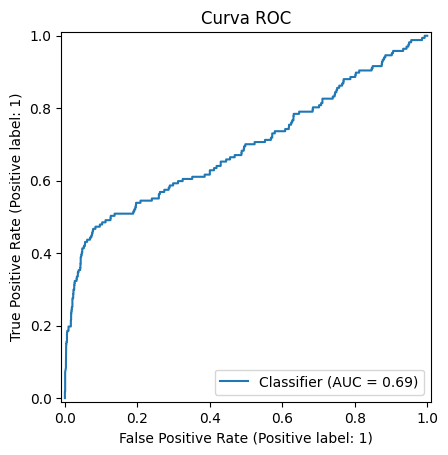

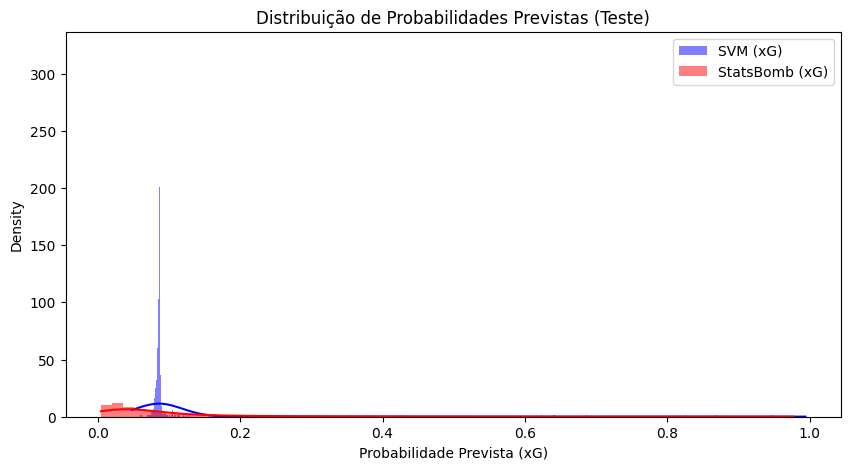

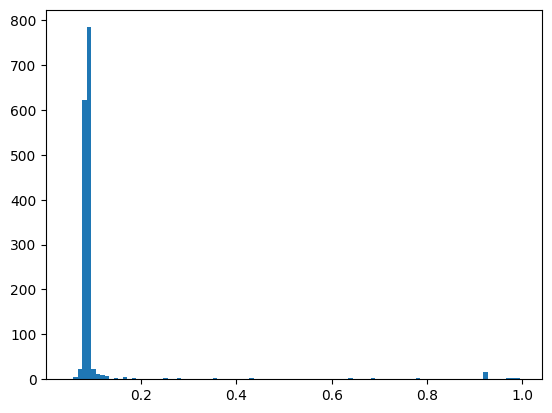

Min 0.04811779870211707
Max 0.9940013215544181
Mean 0.1149922157679085


In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 10 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.63      0.20      0.30       167

    accuracy                           0.90      1567
   macro avg       0.77      0.59      0.62      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0839


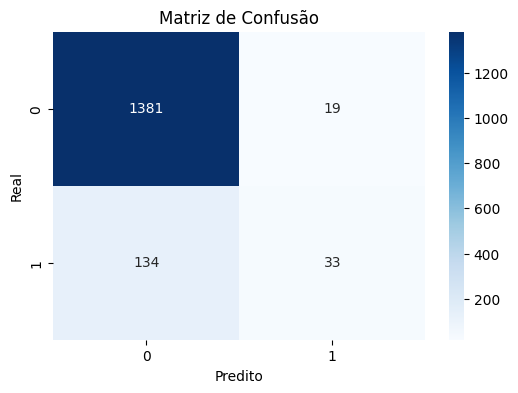

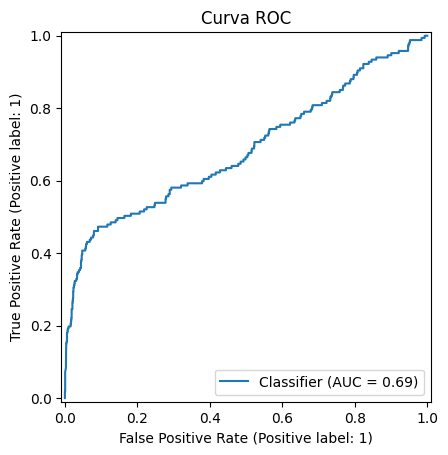

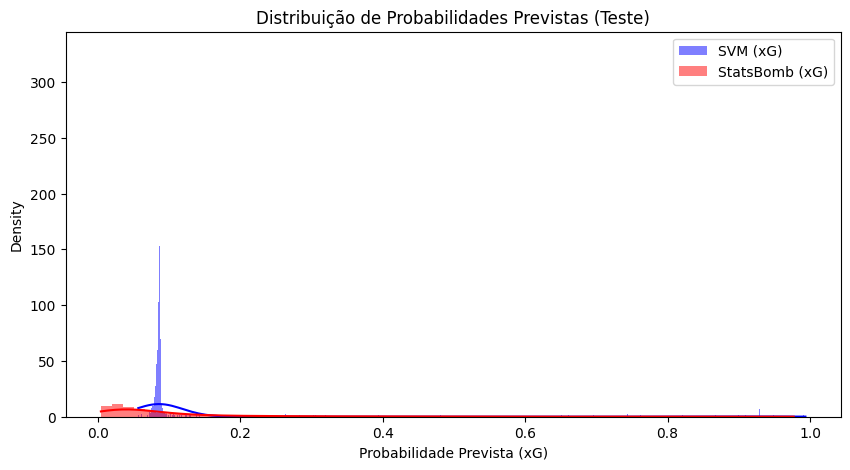

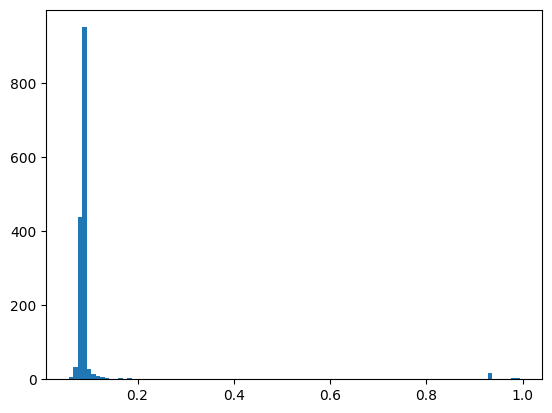

Min 0.05692387252000282
Max 0.9936563572249143
Mean 0.1152274256587975


In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 14 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.64      0.20      0.31       167

    accuracy                           0.90      1567
   macro avg       0.78      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0847


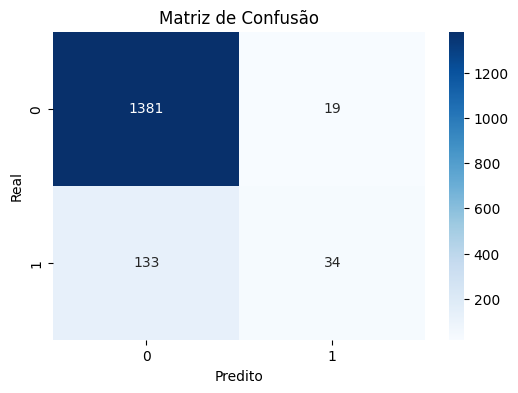

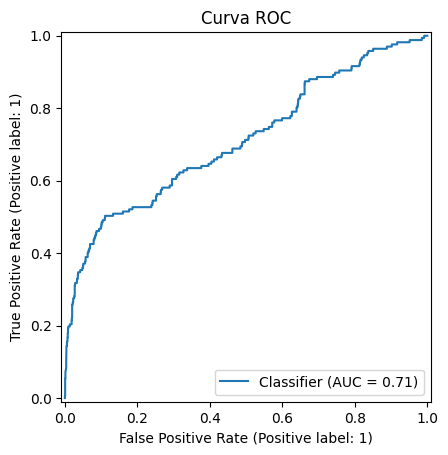

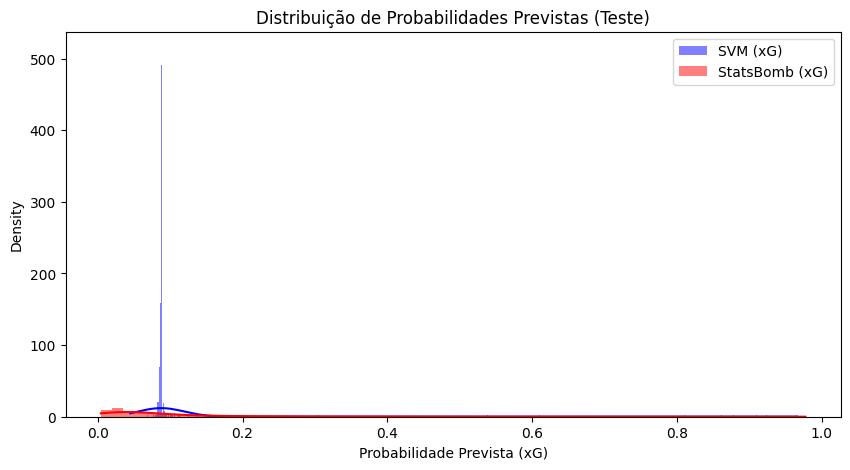

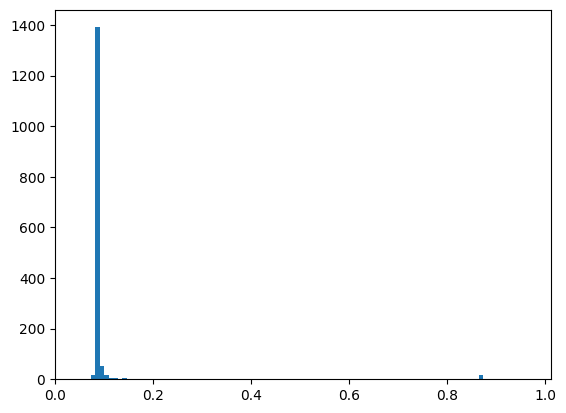

Min 0.04488261319492977
Max 0.9658809401376252
Mean 0.11492276579305973


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 17 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.64      0.20      0.31       167

    accuracy                           0.90      1567
   macro avg       0.78      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0837


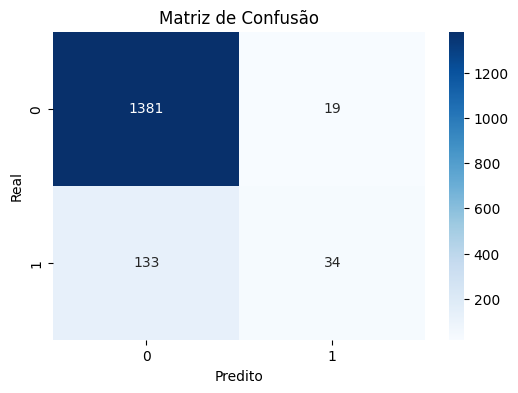

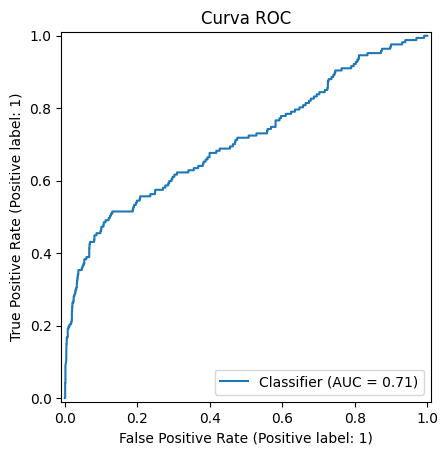

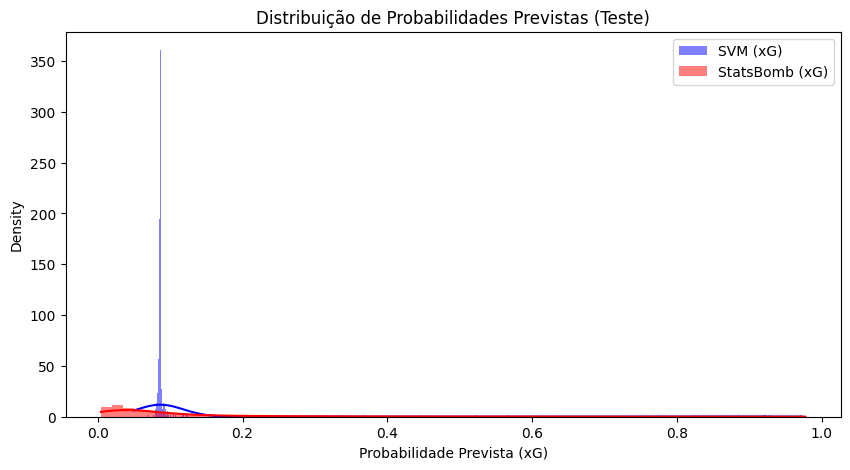

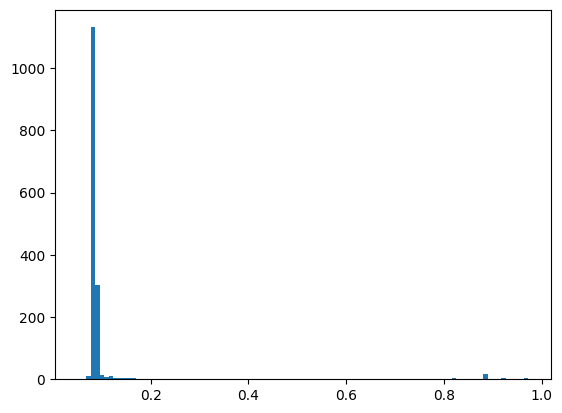

Min 0.05016070893180945
Max 0.972824285889819
Mean 0.11503030362831888


In [ ]:
pca = PCA(n_components=17)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 20 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.64      0.20      0.31       167

    accuracy                           0.90      1567
   macro avg       0.78      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0836


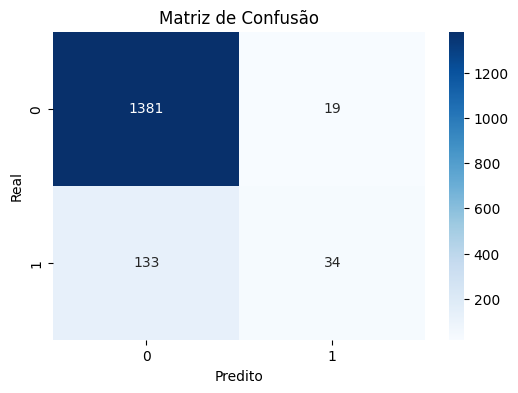

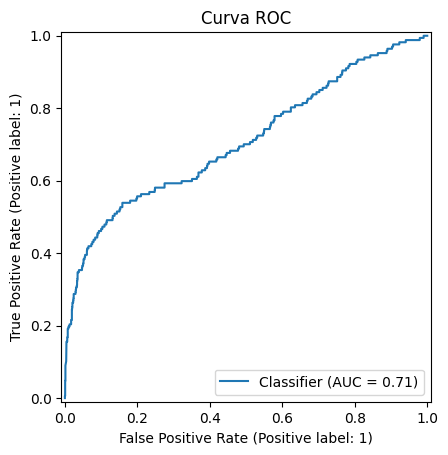

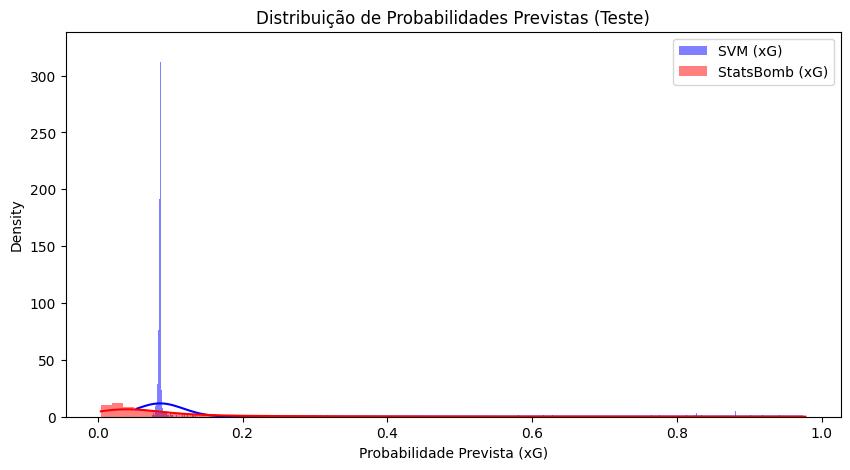

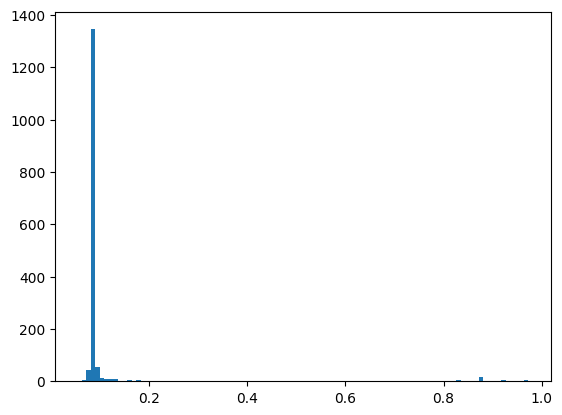

Min 0.053735775800980344
Max 0.9727315497760423
Mean 0.11519028948168203


In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## 23 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.64      0.20      0.31       167

    accuracy                           0.90      1567
   macro avg       0.78      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0836


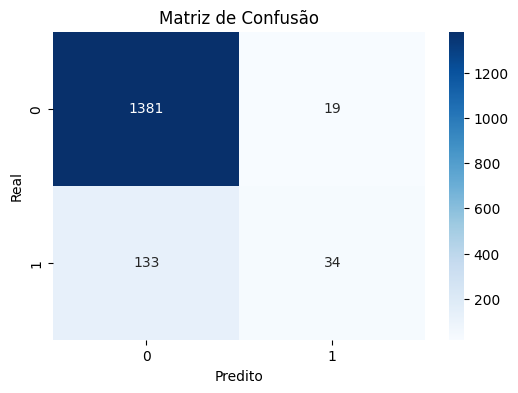

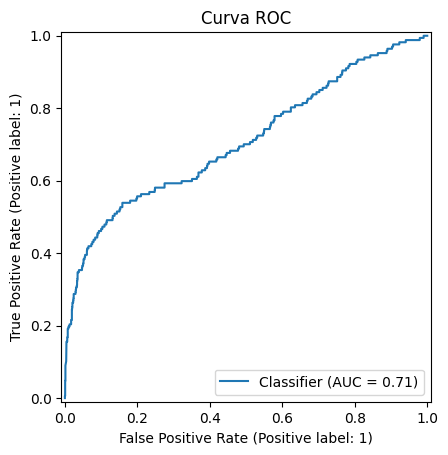

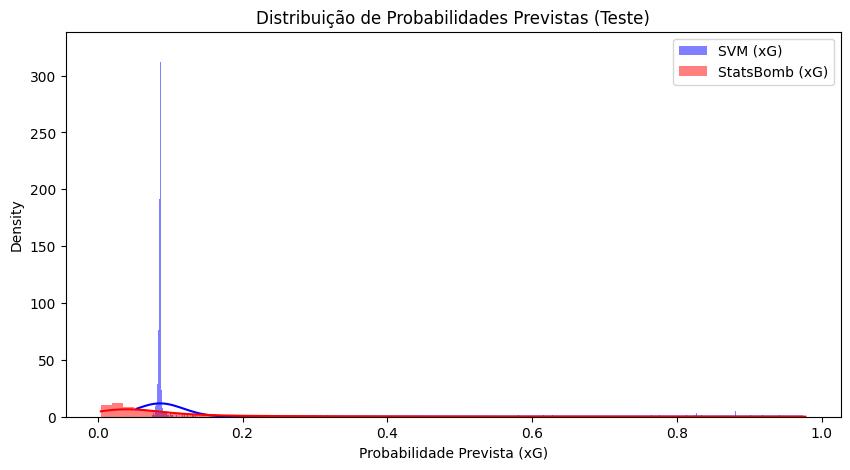

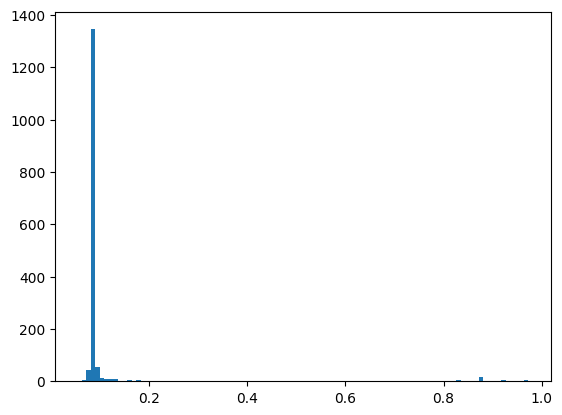

Min 0.053735775800980344
Max 0.9727315497760423
Mean 0.11519028948168203


In [ ]:
pca = PCA(n_components=23)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## Análise das métricas em relação ao PCA

In [ ]:

max_components = X_train_scaled.shape[1]

resultados = []

for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca  = pca.transform(X_test_scaled)

    model = SVC(random_state=42, probability=True)
    model.fit(X_train_pca, y_train.values.ravel())

    y_pred = model.predict(X_test_pca)
    y_prob = model.predict_proba(X_test_pca)[:, 1]

    resultados.append({
        "n_components": n_components,
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "recall": recall_score(y_test, y_pred),
        "brier": brier_score_loss(y_test, y_prob)
    })

results_df = pd.DataFrame(resultados)
results_df.head()

,n_components,accuracy,roc_auc,recall,brier
0,1,0.893427,0.525644,0.000000,0.095203
1,2,0.901723,0.607911,0.203593,0.084809
2,3,0.901723,0.653899,0.197605,0.084580
3,4,0.902361,0.686076,0.197605,0.084671
4,5,0.901723,0.675648,0.197605,0.084211


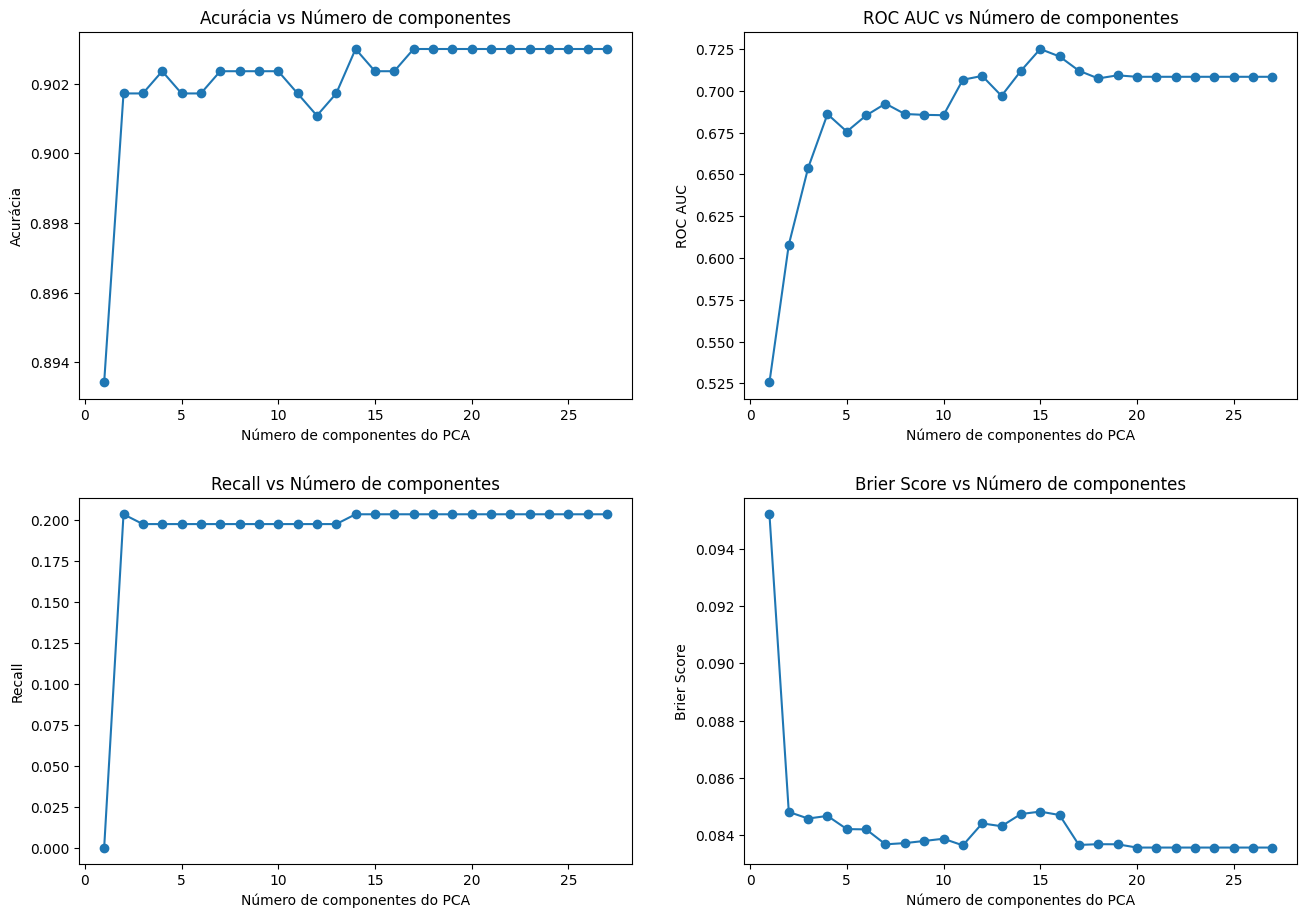

In [ ]:
results_df = pd.DataFrame(resultados, columns=["n_components", "accuracy", "roc_auc", "recall", "brier"])

# Criando uma grid de gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid para as 4 métricas
fig.tight_layout(pad=5.0)  # Ajuste do espaçamento

metrics = ["accuracy", "roc_auc", "recall", "brier"]
titles = ["Acurácia", "ROC AUC", "Recall", "Brier Score"]

for i, metric in enumerate(metrics):
    row = i // 2  # Calculando a linha (0 ou 1)
    col = i % 2   # Calculando a coluna (0 ou 1)

    axes[row, col].plot(results_df["n_components"], results_df[metric], marker='o')
    axes[row, col].set_xlabel("Número de componentes do PCA")
    axes[row, col].set_ylabel(titles[i])
    axes[row, col].set_title(f"{titles[i]} vs Número de componentes")

plt.show()

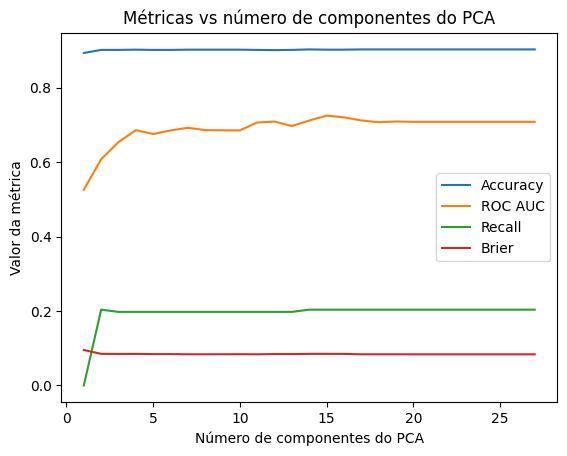

In [ ]:
results_plot = results_df.copy()

# Inverter Brier para manter interpretação "quanto maior, melhor"
results_plot["brier_inv"] = results_plot["brier"]

plt.figure()
plt.plot(results_plot["n_components"], results_plot["accuracy"], label="Accuracy")
plt.plot(results_plot["n_components"], results_plot["roc_auc"], label="ROC AUC")
plt.plot(results_plot["n_components"], results_plot["recall"], label="Recall")
plt.plot(results_plot["n_components"], results_plot["brier_inv"], label="Brier")

plt.xlabel("Número de componentes do PCA")
plt.ylabel("Valor da métrica")
plt.title("Métricas vs número de componentes do PCA")
plt.legend()
plt.show()

# Treinamento 3 - Otimização de Hiperparâmetros

## Maximizando Acurácia

In [ ]:
param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
        'kernel': ['rbf']
    }
]

grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.66      0.22      0.33       167

    accuracy                           0.90      1567
   macro avg       0.79      0.60      0.64      1567
weighted avg       0.89      0.90      0.88      1567


Brier Score:  0.0812


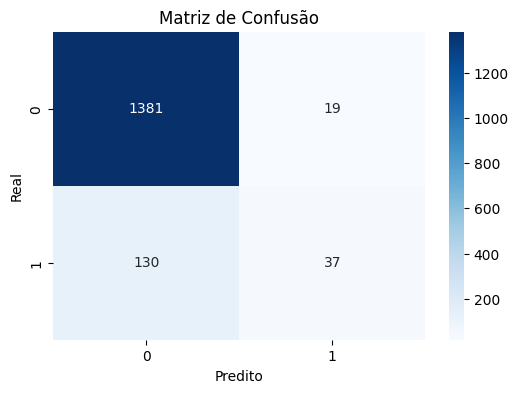

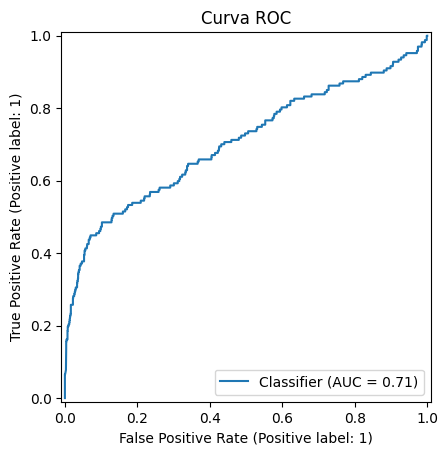

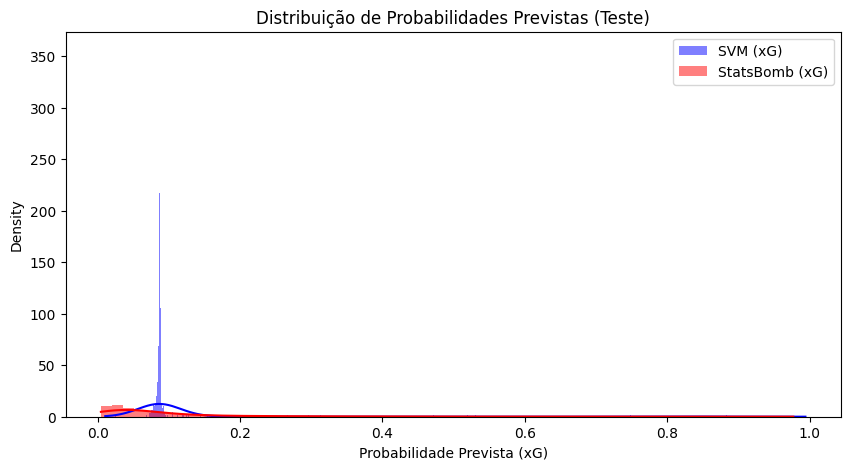

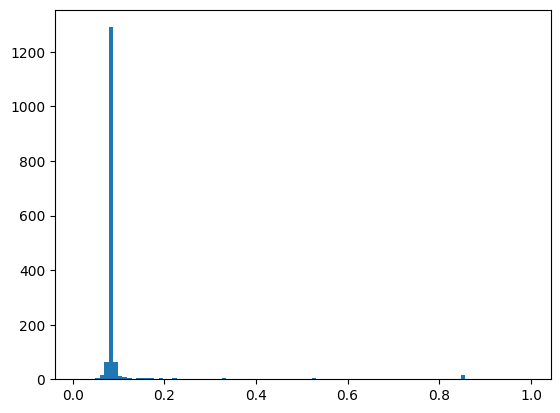

Min 0.0105147995542519
Max 0.99424409659969
Mean 0.1137782958353205


In [ ]:
svm = SVC(random_state=42, probability=True, C=100, gamma=0.001, kernel='rbf')
svm.fit(X_train, y_train)

result(X_test, svm)

## Maximizando Auc

In [ ]:
param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }
]

grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=0
)

grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_)

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1400
           1       0.75      0.07      0.13       167

    accuracy                           0.90      1567
   macro avg       0.83      0.53      0.54      1567
weighted avg       0.88      0.90      0.86      1567


Brier Score:  0.0897


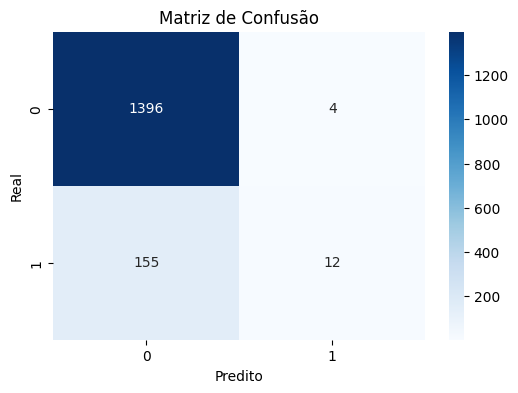

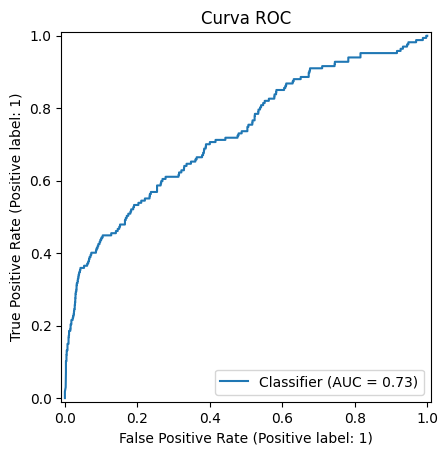

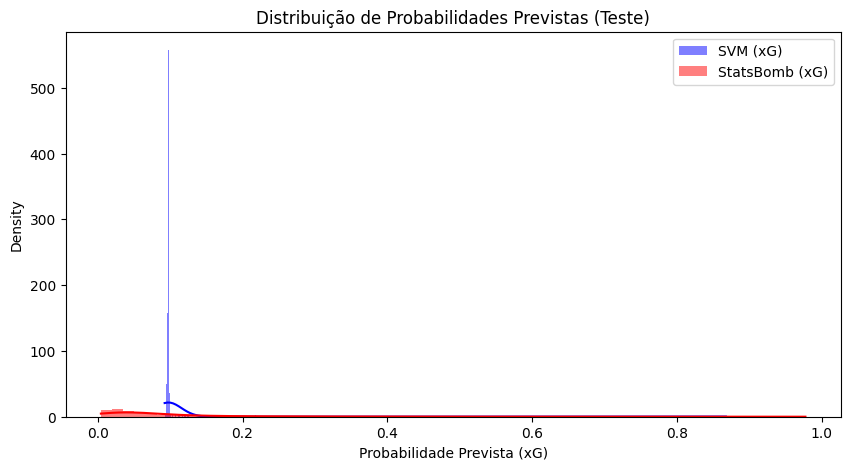

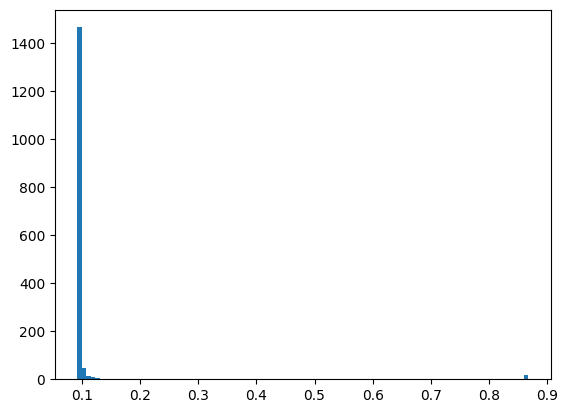

Min 0.09243113753346245
Max 0.8674154215667986
Mean 0.10636761806382572


In [ ]:
svm = SVC(random_state=42, probability=True, C=0.5, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)

result(X_test, svm)

## Maximizando Recall

In [ ]:
param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }
]

grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='recall',
    verbose=0
)

grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1400
           1       0.45      0.33      0.38       167

    accuracy                           0.89      1567
   macro avg       0.69      0.64      0.66      1567
weighted avg       0.87      0.89      0.88      1567


Brier Score:  0.0828


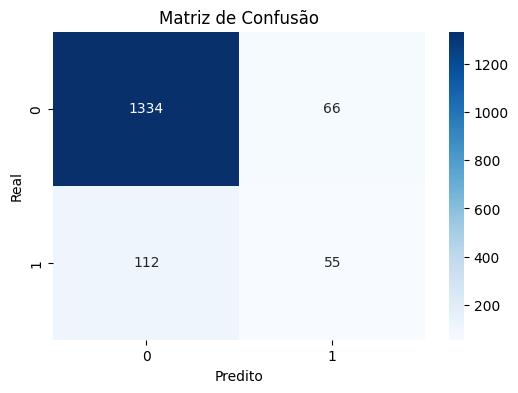

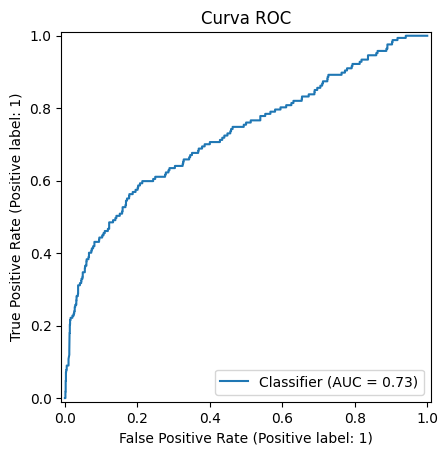

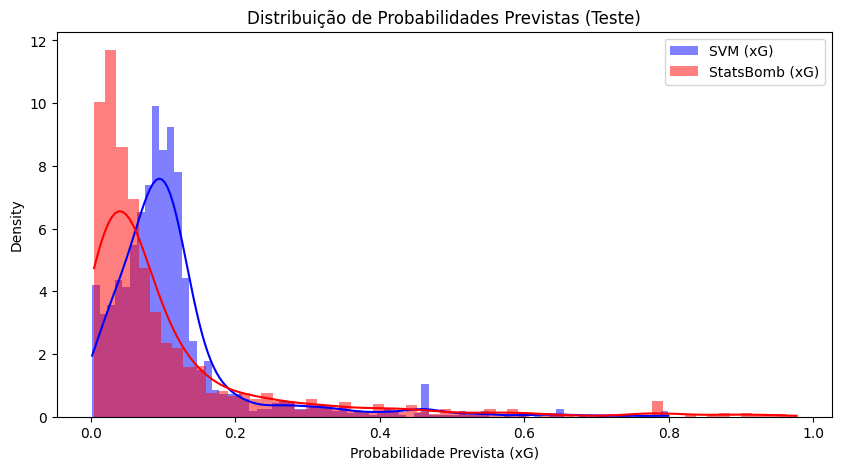

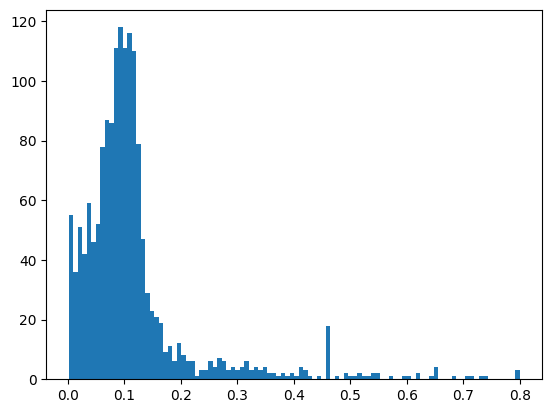

Min 0.0016800172266822108
Max 0.7995705906959636
Mean 0.11502155126931547


In [ ]:
svm = SVC(random_state=42, probability=True, C=100, gamma=0.01, kernel='rbf')
svm.fit(X_train, y_train)

result(X_test, svm)

## Minimizando Brier Score

In [ ]:
param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }
]

grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='neg_brier_score',
    verbose=0
)

grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1400
           1       0.65      0.24      0.35       167

    accuracy                           0.90      1567
   macro avg       0.78      0.61      0.65      1567
weighted avg       0.89      0.90      0.88      1567


Brier Score:  0.0792


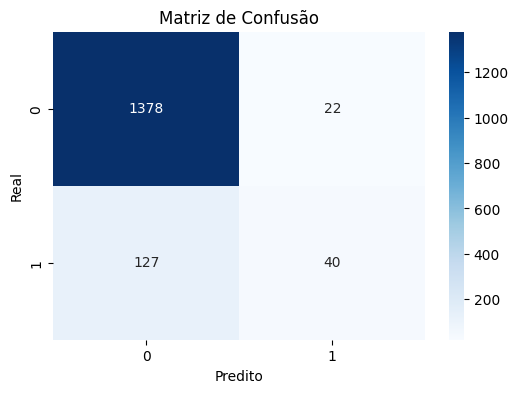

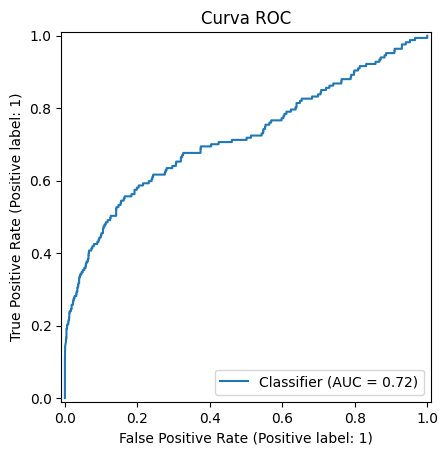

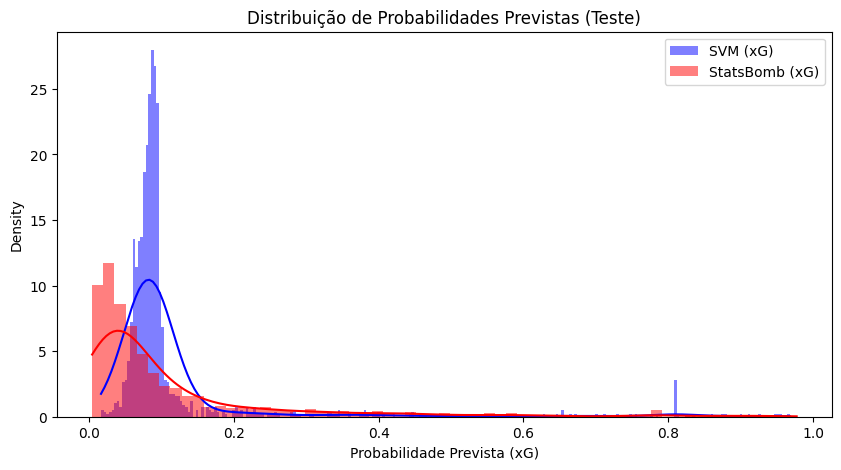

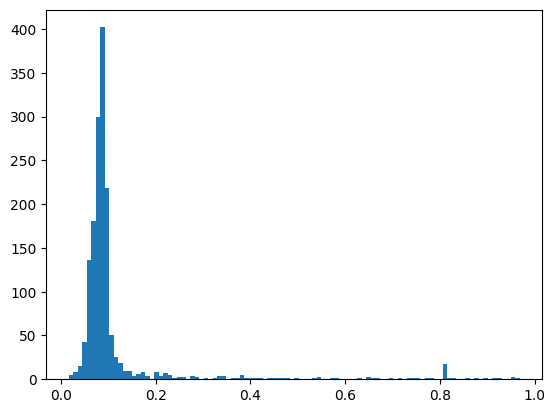

Min 0.016627568392969017
Max 0.9675934551007946
Mean 0.11622167498942766


In [ ]:
svm = SVC(random_state=42, probability=True, C=10, gamma=0.01, kernel='rbf')
svm.fit(X_train, y_train)

result(X_test, svm)

# Treinamento 4 - Otimização de Hiperparâmetros + PCA

## Maximizando Acurácia

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("svm", SVC(random_state=42))
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "svm__C": [0.5, 1, 10, 100],
    "svm__gamma": ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    "svm__kernel": ['rbf']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Melhor parâmetro: {'pca__n_components': 4, 'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.60      0.21      0.31       167

    accuracy                           0.90      1567
   macro avg       0.76      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0846


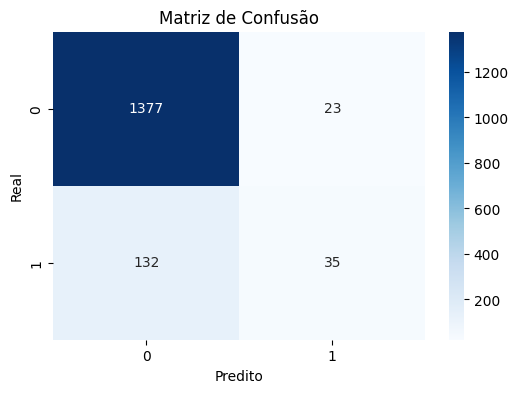

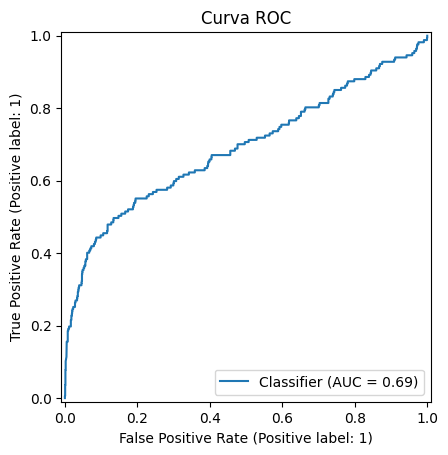

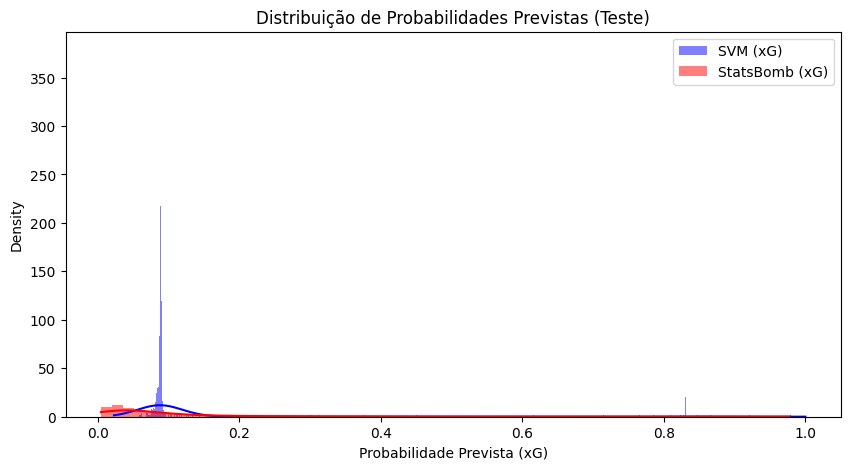

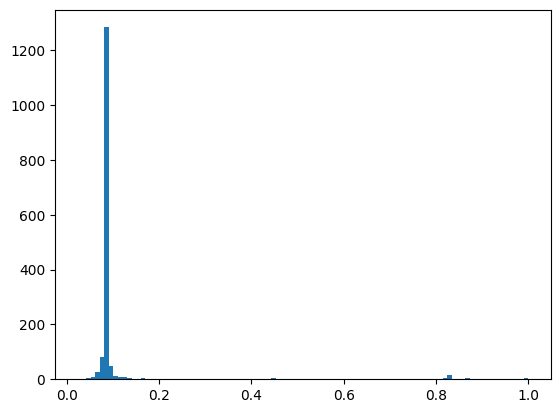

Min 0.022871171769300525
Max 0.9999999909992819
Mean 0.11563540005402848


In [ ]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True, C=100, gamma='scale', kernel='rbf')
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## Maximizando Auc

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("svm", SVC(random_state=42))
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "svm__C": [0.5, 1, 10, 100],
    "svm__gamma": ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    "svm__kernel": ['rbf']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Melhor parâmetro: {'pca__n_components': 14, 'svm__C': 0.5, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1400
           1       0.75      0.07      0.13       167

    accuracy                           0.90      1567
   macro avg       0.83      0.53      0.54      1567
weighted avg       0.88      0.90      0.86      1567


Brier Score:  0.0846


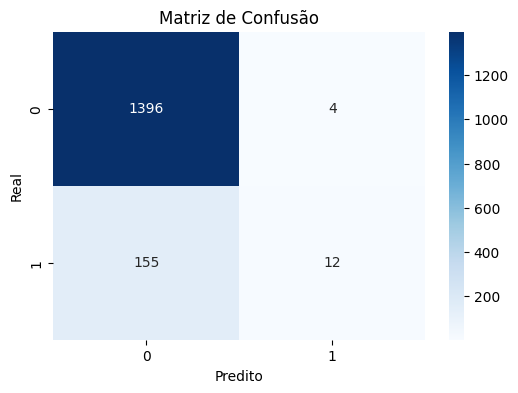

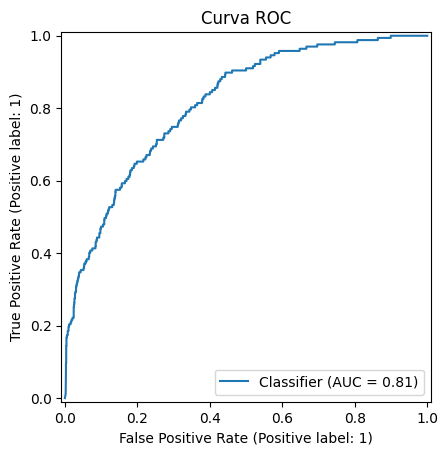

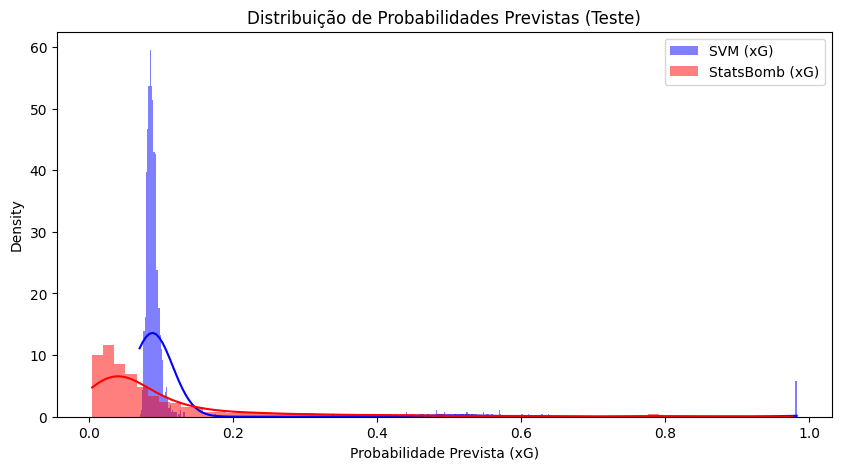

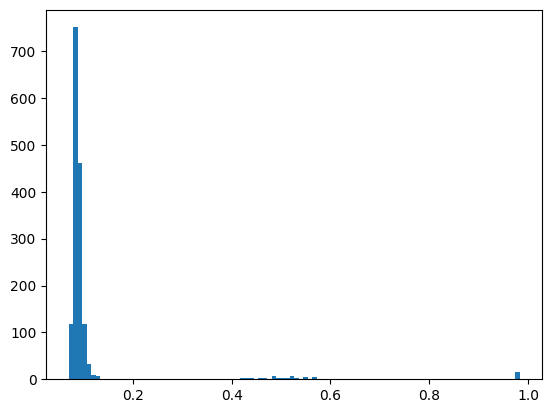

Min 0.07029851386409282
Max 0.9826703519881527
Mean 0.11191712475492462


In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True, C=0.5, gamma=0.001, kernel='rbf')
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## Maximizando Recall

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("svm", SVC(random_state=42))
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "svm__C": [0.5, 1, 10, 100],
    "svm__gamma": ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    "svm__kernel": ['rbf']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Melhor parâmetro: {'pca__n_components': 8, 'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1400
           1       0.36      0.32      0.34       167

    accuracy                           0.87      1567
   macro avg       0.64      0.63      0.63      1567
weighted avg       0.86      0.87      0.86      1567


Brier Score:  0.0874


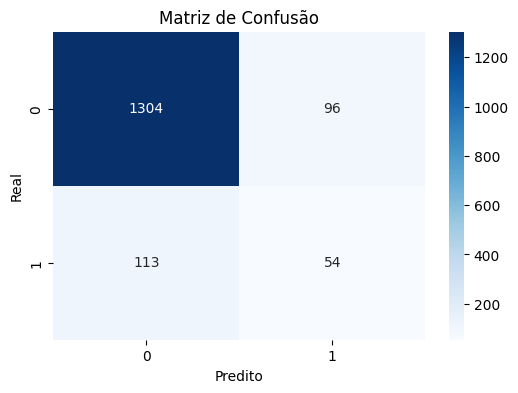

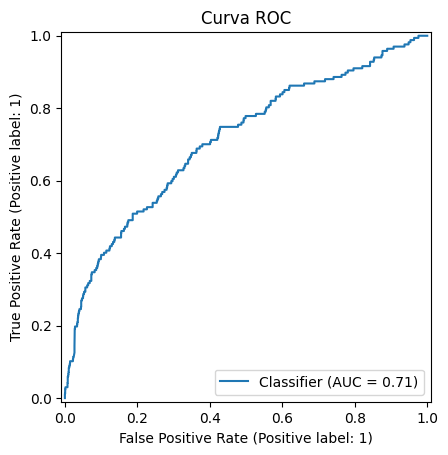

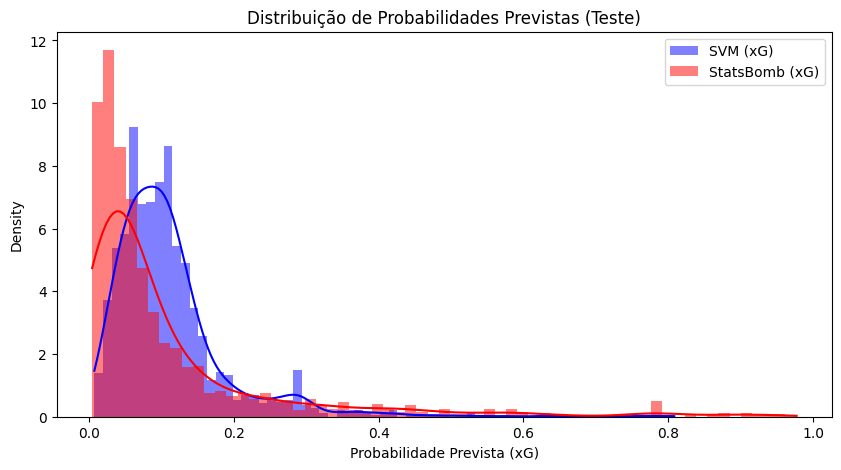

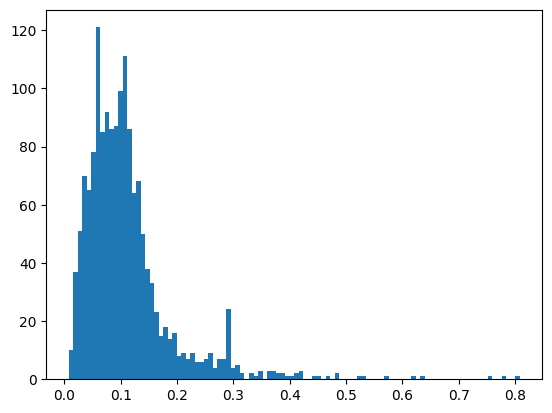

Min 0.007435292853018008
Max 0.8082437000352904
Mean 0.11102410118064106


In [ ]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True, C=100, gamma=1, kernel='rbf')
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)

## Minimizando Brier Score

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("svm", SVC(random_state=42))
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "svm__C": [0.5, 1, 10, 100],
    "svm__gamma": ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    "svm__kernel": ['rbf']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_brier_score",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Melhor parâmetro: {'pca__n_components': 2, 'svm__C': 0.5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.62      0.20      0.31       167

    accuracy                           0.90      1567
   macro avg       0.77      0.59      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0848


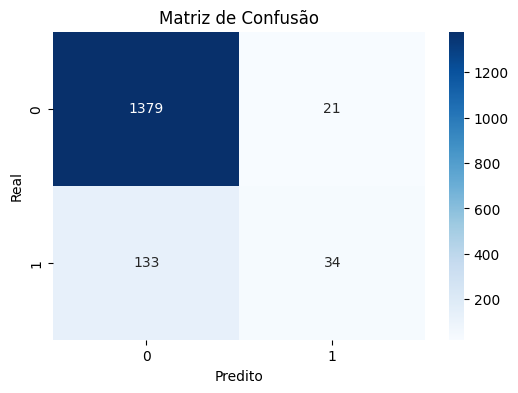

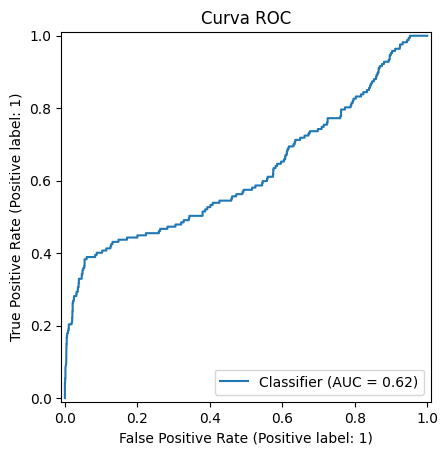

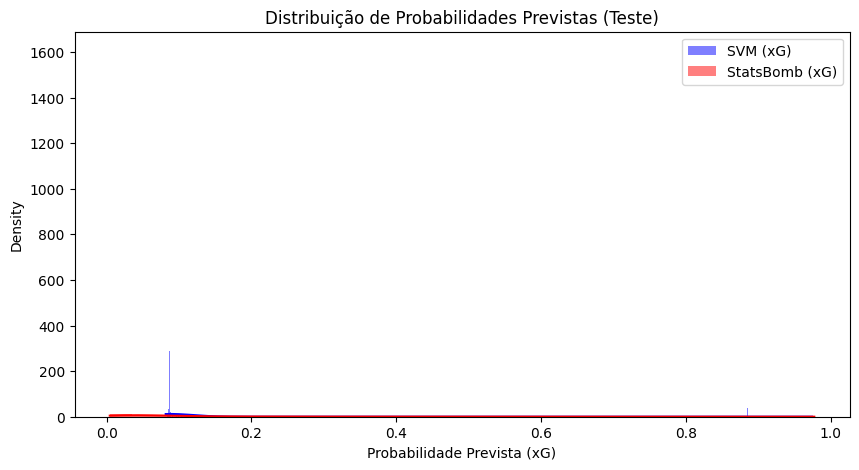

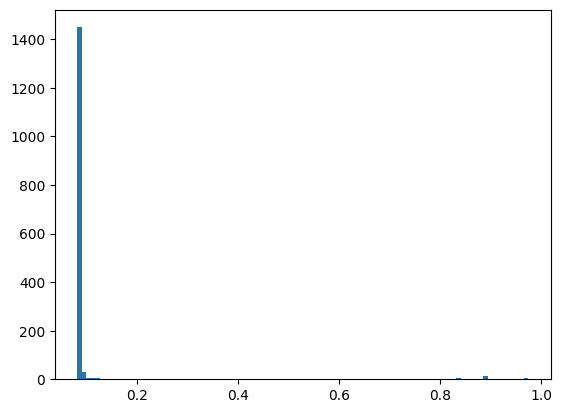

Min 0.08163192027526846
Max 0.9740783019026025
Mean 0.11487160442862233


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=42, probability=True, C=0.5, gamma='scale', kernel='rbf')
svm.fit(X_train_pca, y_train)

result(X_test_pca, svm)